In [108]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from scipy import linalg
from scipy.stats import norm
import random
import pandas as pd 
from keras.layers import Input, Dense
from keras.models import Model

In [109]:
x=np.linspace(1, 10, 100)

In [110]:
#linear
def linear(m,c):
    y=m*x+c
    return y

#gaussian
def gaussian(mu,sigma,a):
    gu=((a * np.exp( - (x - mu)**2 / (2 * sigma**2) )))
    return gu

In [244]:
def calc():
    m=random.uniform(.1,2)
    mu=random.uniform(3,6)
    sigma=random.uniform(.1,2)
    c=random.uniform(0,3)
    a=random.uniform(-2,6)
    noise=(np.random.normal(0,.1,100))
    li=linear(m,c)
    gaus=gaussian(mu,sigma,a)
    sig=li+gaus
    return sig

def calc2():
    m=random.uniform(.1,2)
    mu=random.uniform(3,6)
    sigma=random.uniform(.1,2)
    c=random.uniform(0,3)
    a=random.uniform(-2,6)
    noise=(np.random.normal(0,.1,100))
    li=linear(m,c)
    gaus=gaussian(mu,sigma,a)
    sig=li+gaus+noise
    return sig

def calc3():
    m=random.uniform(.1,2)
    mu=random.uniform(3,6)
    sigma=random.uniform(.1,2)
    c=random.uniform(0,3)
    a=random.uniform(-2,6)
    noise=(np.random.normal(0,1,100))
    li=linear(m,c)
    gaus=gaussian(mu,sigma,a)
    sig=li+gaus+noise
    return sig


sign=[ calc() for i in range(3000)]
dat=np.array(sign)
signf=[ calc2() for i in range(1500)]
datf=np.array(signf)
signf1=[ calc3() for i in range(1500)]
datf1=np.array(signf1)

In [245]:


# this is the size of our encoded representations

# # this is our input placeholder
# input_img = Input(shape=(100,))

# # "encoded" is the encoded representation of the input
# encoded = Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = Dense(100, activation='sigmoid')(encoded)

# # this model maps an input to its reconstruction
# autoencoder = Model(input_img, decoded)
# encoder = Model(input_img, encoded)
# encoded_input = Input(shape=(encoding_dim,))
# # retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # create the decoder model
# decoder = Model(encoded_input, decoder_layer(encoded_input))
# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

input_img = Input(shape=(100,))
encoded = Dense(450, activation='relu')(input_img)
encoded = Dense(234, activation='relu')(encoded)
encoded = Dense(322, activation='relu')(encoded)
encoded = Dense(162, activation='relu')(encoded)

decoded = Dense(623, activation='relu')(encoded)
decoded = Dense(458, activation='relu')(decoded)
decoded = Dense(100, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



In [246]:
#x_train,x_test=np.split(dat,2)

In [247]:
dat = dat.astype('float32')/225
datf= dat.astype('float32')/225



In [248]:
autoencoder.fit(datf,dat,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(datf,dat))

Train on 3000 samples, validate on 3000 samples
Epoch 1/10
3000/3000 [==============================] - 3s 845us/step - loss: 0.6840 - val_loss: 0.6697
Epoch 2/10
3000/3000 [==============================] - 1s 478us/step - loss: 0.6435 - val_loss: 0.5737
Epoch 3/10
3000/3000 [==============================] - 1s 432us/step - loss: 0.3253 - val_loss: 0.1537
Epoch 4/10
3000/3000 [==============================] - 1s 438us/step - loss: 0.1518 - val_loss: 0.1506
Epoch 5/10
3000/3000 [==============================] - 1s 426us/step - loss: 0.1504 - val_loss: 0.1503
Epoch 6/10
3000/3000 [==============================] - 1s 403us/step - loss: 0.1503 - val_loss: 0.1503
Epoch 7/10
3000/3000 [==============================] - 1s 487us/step - loss: 0.1502 - val_loss: 0.1502
Epoch 8/10
3000/3000 [==============================] - 1s 496us/step - loss: 0.1502 - val_loss: 0.1502
Epoch 9/10
3000/3000 [==============================] - 1s 442us/step - loss: 0.1502 - val_loss: 0.1502
Epoch 10/10
3000

In [249]:
encoded_imgs = autoencoder.predict(datf1)
decoded_imgs = autoencoder.predict(encoded_imgs)

the wave type on which module was trained (with no noise )


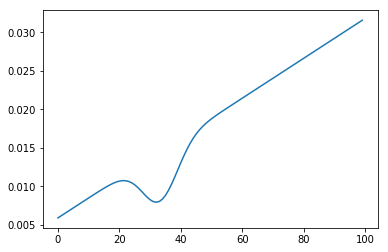

In [270]:
print("the wave type on which module was trained (with no noise )")
plt.plot(dat[25])
plt.show()

the wave that was given for input (very high noise )


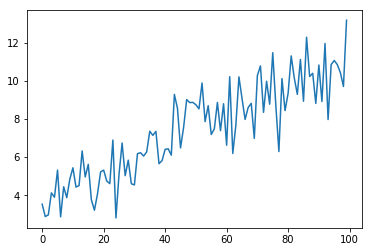

In [258]:
print("the wave that was given for input (very high noise )")
plt.plot(datf1[7])
plt.show()

the wave recovred (denoised )


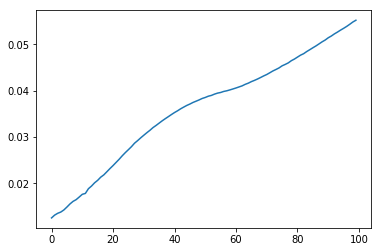

In [259]:
print("the wave recovred (denoised )")
plt.plot(decoded_imgs[7])
plt.show()